## Análise e diagnóstico

Nesse notebook são feitas algumas análises para o diagnóstico dos dados da API do Olho Vivo

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

df_final = load_csv('df_final.csv')

Ônibus que operam em mais de uma linha

In [3]:
df_posicoes

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m)
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m)
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus
...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03T11:34:57Z,-23.463490,-46.746013,False,Articulado (23m)
147588,6L02-10,66258,2025-09-03T11:34:51Z,-23.910759,-46.766351,False,Padron
147589,8021-10,80113,2025-09-03T11:35:01Z,-23.577175,-46.765109,True,Miniônibus
147590,6815-10,72011,2025-09-03T11:34:35Z,-23.656454,-46.763021,False,Articulado (18m)


In [4]:
df_posicoes['id_2'] = df_posicoes['linha'] + '_' + df_posicoes['id_onibus'].astype(str)

df_posicoes.head()

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus,342M-10_41501
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus,342M-10_41510
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus,342M-10_41583


In [5]:
df_posicoes['id_onibus'].nunique()

11524

In [6]:
df_posicoes['id_2'].nunique()

11544

In [7]:
df = df_posicoes.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = df_posicoes[df_posicoes['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
3020,7311,675K-10
80379,7311,675K-23
69005,7311,677A-10
11197,10418,8047-51
84319,10418,8047-10
8190,12683,917M-31
126142,12683,917M-10
41049,22116,1788-10
518,22116,1788-31
5199,31128,4310-21


In [8]:
counts = df_posicoes.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([ 7311, 10418, 12683, 22116, 31128, 36195, 36263, 36520, 41559, 47571,
       51449, 55093, 61221, 61668, 66943, 73837, 85763, 90999],
      dtype='int64', name='id_onibus')

Ônibus duplicados

In [ ]:
duplicados = (df_posicoes.groupby(["id_onibus", "timestamp"]).filter(lambda x: len(x) > 1).sort_values(["id_onibus", "timestamp"]))

duplicados

Horas e datas das posições

In [9]:
df_posicoes["timestamp"] = pd.to_datetime(df_posicoes["timestamp"])

In [10]:
df_posicoes['timestamp'] = df_posicoes['timestamp'].dt.tz_convert("America/Sao_Paulo")

df_posicoes

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
0,342M-10,41610,2025-09-03 08:27:39-03:00,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610
1,342M-10,41501,2025-09-03 08:27:27-03:00,-23.599379,-46.485247,True,Miniônibus,342M-10_41501
2,342M-10,41783,2025-09-03 08:27:57-03:00,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783
3,342M-10,41510,2025-09-03 08:27:27-03:00,-23.613857,-46.476304,True,Miniônibus,342M-10_41510
4,342M-10,41583,2025-09-03 08:27:38-03:00,-23.613857,-46.476304,True,Midiônibus,342M-10_41583
...,...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03 08:34:57-03:00,-23.463490,-46.746013,False,Articulado (23m),8009-10_10423
147588,6L02-10,66258,2025-09-03 08:34:51-03:00,-23.910759,-46.766351,False,Padron,6L02-10_66258
147589,8021-10,80113,2025-09-03 08:35:01-03:00,-23.577175,-46.765109,True,Miniônibus,8021-10_80113
147590,6815-10,72011,2025-09-03 08:34:35-03:00,-23.656454,-46.763021,False,Articulado (18m),6815-10_72011


In [11]:
horas = df_posicoes["timestamp"].dt.hour

horas_unicas = horas.unique()
horas_unicas.sort()

print(horas_unicas)

[ 0  1  7  8 11 13]


In [12]:
onze_horas = df_posicoes[df_posicoes["timestamp"].dt.hour == 11]

onze_horas

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
700,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (18m),1721-10_22538
12056,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Biarticulado,1721-10_22538
23095,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (18m),1721-10_22538
34457,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Básico,1721-10_22538
46599,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Básico,1721-10_22538
57967,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Padron,1721-10_22538
68520,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Midiônibus,1721-10_22538
79894,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,True,Articulado (23m),1721-10_22538
91570,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Padron,1721-10_22538
103399,1721-10,22538,2025-09-02 11:59:03-03:00,-23.490838,-46.57736,False,Articulado (18m),1721-10_22538


In [13]:
datas = df_posicoes["timestamp"].dt.date

datas_unicas = datas.unique()
datas_unicas.sort()

print(datas_unicas)

[datetime.date(2025, 9, 2) datetime.date(2025, 9, 3)]


Distâncias e velocidades impossíveis

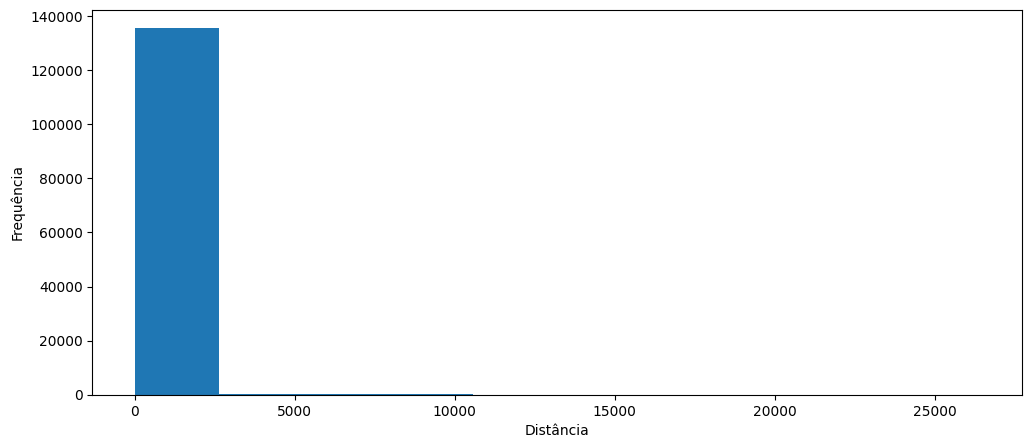

In [20]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_percorrida"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

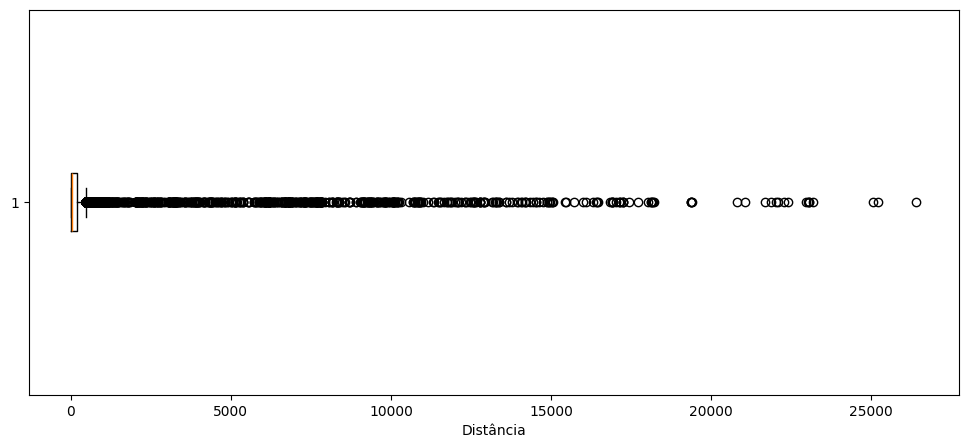

In [21]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_percorrida"], vert=False)
plt.xlabel("Distância")
plt.show()

In [22]:
gdf_final[gdf_final['distancia_percorrida'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
21967,31841,3459-10,False,25074.054972,"[333746.05902389076, 7394866.148214988]","[358537.9671505152, 7398617.084653763]",2025-09-03 08:31:56-03:00,2025-09-03 08:32:47-03:00,Biarticulado,0.90,871.060894,2112.323660
38884,61587,5370-10,False,25225.010680,"[325117.0786599126, 7370478.8199460115]","[332865.93880648626, 7394484.159565672]",2025-09-03 08:28:45-03:00,2025-09-03 08:29:37-03:00,Miniônibus,0.35,246.889930,822.029635
114742,32503,2678-10,False,26412.841301,"[333800.73546429066, 7394668.411742855]","[359422.7636728245, 7401083.2270999625]",2025-09-03 08:31:04-03:00,2025-09-03 08:31:48-03:00,Articulado (23m),0.85,779.443389,1641.649051


In [23]:
gdf_final['momento_final'].dtype

datetime64[ns, America/Sao_Paulo]

In [24]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final']   = pd.to_datetime(gdf_final['momento_final'])

gdf_final['momento_final'].dtype

datetime64[ns, America/Sao_Paulo]

In [25]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,3.314524,6.980988,45.0
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:28:24-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,0.000000,0.000000,0.0
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,10.353012,21.805319,90.0
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,5.879057,12.382360,44.0
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,6.171404,12.998096,45.0


In [26]:
gdf_final["velocidade"] = (gdf_final["distancia_percorrida"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,3.314524,6.980988,45.0,8.985488
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:28:24-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,0.000000,0.000000,0.0,NaN
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,10.353012,21.805319,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,5.879057,12.382360,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,6.171404,12.998096,45.0,16.730330


In [27]:
gdf_final['velocidade'].describe()

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.034050e+05
mean              inf
std               NaN
min      0.000000e+00
25%      9.022210e-01
50%      9.329436e+00
75%      1.785485e+01
max               inf
Name: velocidade, dtype: float64

In [28]:
gdf_final = gdf_final.replace([np.inf, -np.inf], np.nan)

gdf_final = gdf_final.dropna(subset=['velocidade'])

In [29]:
gdf_final['velocidade'].describe()

count    103403.000000
mean         14.990810
std          73.126904
min           0.000000
25%           0.902221
50%           9.329153
75%          17.854298
max        8719.623379
Name: velocidade, dtype: float64

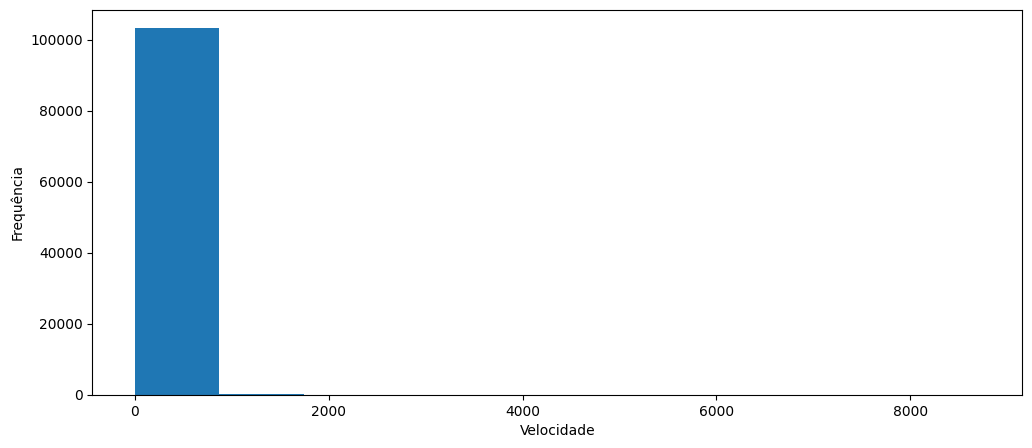

In [30]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["velocidade"])
plt.xlabel("Velocidade")
plt.ylabel("Frequência")
plt.show()

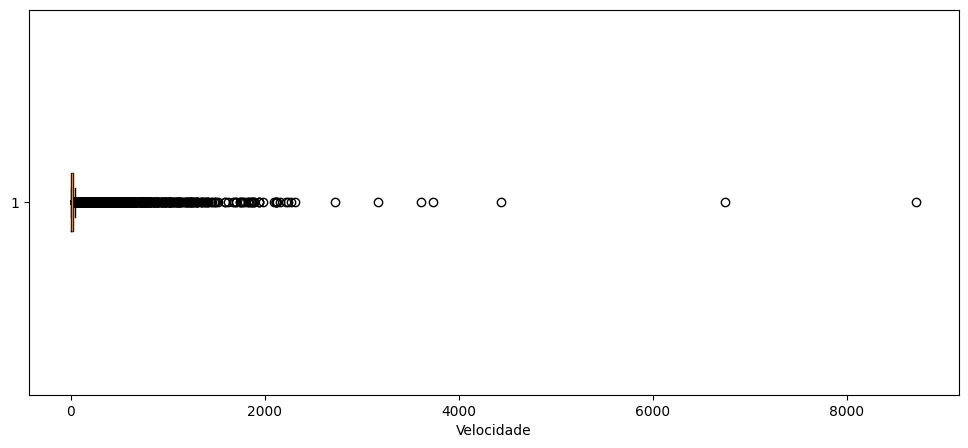

In [31]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["velocidade"], vert=False)
plt.xlabel("Velocidade")
plt.show()

In [32]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 08:27:39-03:00,2025-09-03 08:28:24-03:00,Articulado (23m),0.85,3.314524,6.980988,45.0,8.985488
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 08:28:24-03:00,2025-09-03 08:29:54-03:00,Articulado (23m),0.85,10.353012,21.805319,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 08:29:54-03:00,2025-09-03 08:30:38-03:00,Articulado (23m),0.85,5.879057,12.382360,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 08:30:38-03:00,2025-09-03 08:31:23-03:00,Articulado (23m),0.85,6.171404,12.998096,45.0,16.730330
6,41610,342M-10,True,103.787302,"[341474.75205618294, 7397551.609921319]","[341450.1347490767, 7397450.784368243]",2025-09-03 08:31:23-03:00,2025-09-03 08:32:08-03:00,Articulado (23m),0.85,3.062765,6.450738,45.0,8.302984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136041,66943,6072-10,True,0.000000,"[325090.75920336903, 7370471.967237391]","[325090.75920336903, 7370471.967237391]",2025-09-03 08:34:15-03:00,2025-09-03 08:35:00-03:00,Articulado (23m),0.85,0.000000,0.000000,45.0,0.000000
136042,12683,917M-10,False,0.000000,"[332803.41292618687, 7391130.669386968]","[332803.41292618687, 7391130.669386968]",2025-09-03 08:34:15-03:00,2025-09-03 08:34:42-03:00,Articulado (23m),0.85,0.000000,0.000000,27.0,0.000000
136044,77879,6049-10,False,0.000000,"[320068.8812658792, 7382609.836585452]","[320068.8812658792, 7382609.836585452]",2025-09-03 08:34:18-03:00,2025-09-03 08:35:03-03:00,Articulado (18m),0.80,0.000000,0.000000,45.0,0.000000
136045,31643,274P-10,True,79.442467,"[334093.9212274977, 7394299.5003555715]","[334040.2683614021, 7394240.9130234085]",2025-09-03 08:34:08-03:00,2025-09-03 08:34:53-03:00,Articulado (18m),0.80,1.571583,5.617398,45.0,6.355397


In [33]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
48,41583,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 08:27:38-03:00,2025-09-03 08:28:30-03:00,Midiônibus,0.47,242.145358,442.896705,52.0,883.845887
98,41815,342M-10,False,12766.662806,"[342071.82555585005, 7398209.143348921]","[349387.50354469114, 7387746.422155516]",2025-09-03 08:28:35-03:00,2025-09-03 08:29:20-03:00,Miniônibus,0.35,124.953782,416.038483,45.0,1021.333024
105,41815,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 08:33:05-03:00,2025-09-03 08:33:50-03:00,Miniônibus,0.35,124.953782,416.038483,45.0,1021.333024
280,16012,9191-10,False,9188.408306,"[333415.14199033706, 7397208.287510074]","[328564.67902236397, 7405012.123502918]",2025-09-03 08:30:41-03:00,2025-09-03 08:31:26-03:00,Biarticulado,0.90,319.200989,774.062763,45.0,735.072665
333,16372,9191-10,False,9160.841764,"[333288.33738785924, 7397163.0424438175]","[328564.67902236397, 7405012.123502918]",2025-09-03 08:28:36-03:00,2025-09-03 08:29:20-03:00,Midiônibus,0.47,173.753732,317.804793,44.0,749.523417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135954,32053,2765-10,True,9788.776238,"[339036.9549540298, 7395834.884184625]","[347261.97112645453, 7401142.355258925]",2025-09-03 08:32:00-03:00,2025-09-03 08:32:45-03:00,Biarticulado,0.90,340.057489,824.639799,45.0,783.102099
135986,32018,805L-10,False,4384.908831,"[333125.8381888706, 7391735.523750455]","[332183.3600302363, 7396017.948341782]",2025-09-03 08:32:50-03:00,2025-09-03 08:33:34-03:00,Biarticulado,0.90,152.329673,369.399632,44.0,358.765268
136001,72014,6804-10,True,1659.803675,"[323118.3063822094, 7384129.283980075]","[321535.9105864066, 7384630.254821043]",2025-09-03 08:32:54-03:00,2025-09-03 08:33:39-03:00,Miniônibus,0.35,16.245338,54.089484,45.0,132.784294
136034,71746,5111-10,False,13956.203554,"[333642.65488864016, 7394863.699479774]","[325719.849591805, 7383374.366432779]",2025-09-03 08:34:21-03:00,2025-09-03 08:35:06-03:00,Articulado (18m),0.80,276.090763,986.846886,45.0,1116.496284


In [34]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
